# EDA for Patient Hospital Death Prediction

This notebook explores the dataset, data quality, distributions, relationships with the target (`hospital_death`), and group-level mortality rates.
We'll proceed in a logical order: load → overview → missingness / useless columns → target balance → categorical features → numerical features → correlations → ICU/hospital-level analysis.

In [18]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
# Load data
data_path = '../data/dataset.csv'
df = pd.read_csv(data_path)
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0


In [20]:
# Basic info: shape and types
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [21]:
# Column names
list(df.columns)

['encounter_id',
 'patient_id',
 'hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'heart_rate_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'temp_apache',
 'ventilated_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp

In [22]:
# Summary statistics (quick look)
df.describe(include='all').T.head(50)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,91713.0,NaN,NaN,NaN,65606.07928,37795.088538,1.0,32852.0,65665.0,98342.0,131051.0
patient_id,91713.0,NaN,NaN,NaN,65537.131464,37811.252183,1.0,32830.0,65413.0,98298.0,131051.0
hospital_id,91713.0,NaN,NaN,NaN,105.669262,62.854406,2.0,47.0,109.0,161.0,204.0
age,87485.0,NaN,NaN,NaN,62.309516,16.775119,16.0,52.0,65.0,75.0,89.0
bmi,88284.0,NaN,NaN,NaN,29.185818,8.275142,14.844926,23.641975,27.654655,32.930206,67.81499
elective_surgery,91713.0,NaN,NaN,NaN,0.183736,0.387271,0.0,0.0,0.0,0.0,1.0
ethnicity,90318,6,Caucasian,70684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,91688,2,M,49469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,90379.0,NaN,NaN,NaN,169.641588,10.795378,137.2,162.5,170.1,177.8,195.59
icu_admit_source,91601,5,Accident & Emergency,54060,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Check missingness: proportion missing per column
missing = df.isna().mean().sort_values(ascending=False)
missing.head(30)

d1_potassium_min                 0.104511
d1_potassium_max                 0.104511
h1_mbp_noninvasive_min           0.099048
h1_mbp_noninvasive_max           0.099048
apache_4a_icu_death_prob         0.086651
apache_4a_hospital_death_prob    0.086651
h1_diasbp_noninvasive_min        0.080141
h1_diasbp_noninvasive_max        0.080141
h1_sysbp_noninvasive_max         0.080043
h1_sysbp_noninvasive_min         0.080043
d1_glucose_min                   0.063317
d1_glucose_max                   0.063317
h1_mbp_max                       0.050582
h1_mbp_min                       0.050582
h1_resprate_min                  0.047507
h1_resprate_max                  0.047507
age                              0.046100
h1_spo2_max                      0.045631
h1_spo2_min                      0.045631
temp_apache                      0.044792
h1_diasbp_min                    0.039460
h1_diasbp_max                    0.039460
h1_sysbp_min                     0.039373
h1_sysbp_max                     0

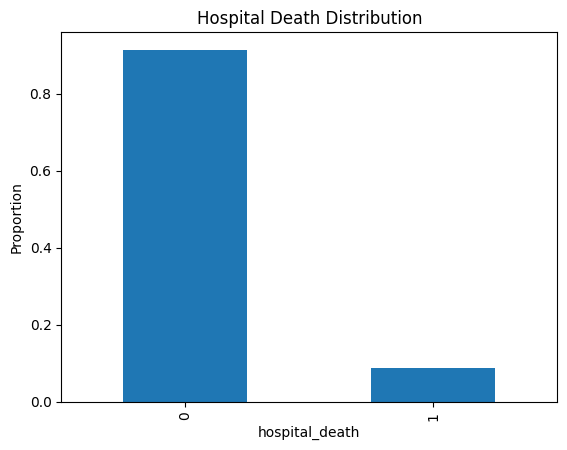

hospital_death
0    83798
1     7915
Name: count, dtype: int64


In [24]:
# Target distribution (check class balance)
target_col = 'hospital_death'
df[target_col].value_counts(normalize=True).plot(kind='bar')
plt.title('Hospital Death Distribution')
plt.ylabel('Proportion')
plt.show()
# Print counts too
print(df[target_col].value_counts(dropna=False))


Column: gender


gender
M    49469
F    42219
Name: count, dtype: int64

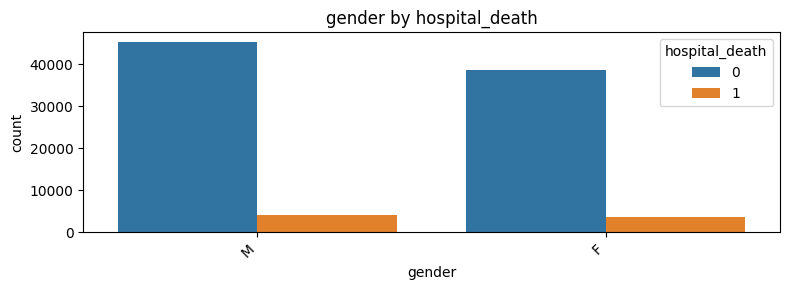


Column: ethnicity


ethnicity
Caucasian           70684
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: count, dtype: int64

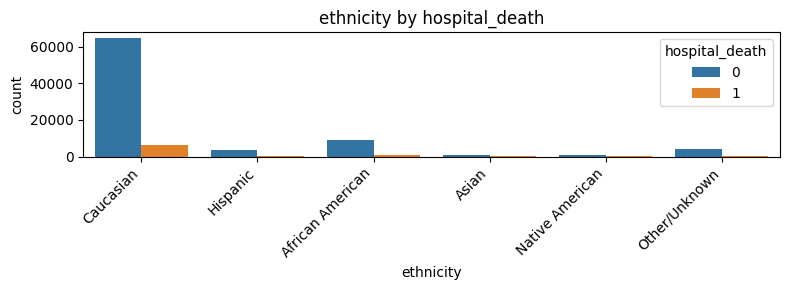


Column: icu_type


icu_type
Med-Surg ICU    50586
MICU             7695
Neuro ICU        7675
CCU-CTICU        7156
SICU             5209
Cardiac ICU      4776
CSICU            4613
CTICU            4003
Name: count, dtype: int64

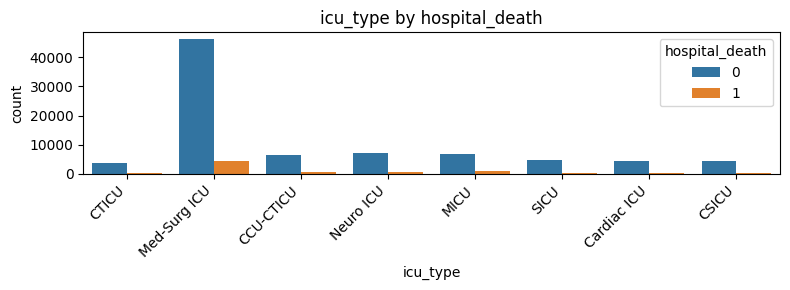


Column: icu_admit_source


icu_admit_source
Accident & Emergency         54060
Operating Room / Recovery    18713
Floor                        15611
Other Hospital                2358
Other ICU                      859
Name: count, dtype: int64

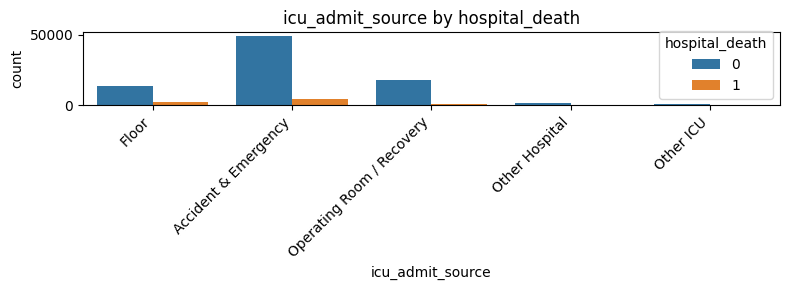


Column: apache_2_bodysystem


apache_2_bodysystem
Cardiovascular         38816
Neurologic             11896
Respiratory            11609
Gastrointestinal        9026
Metabolic               7650
Trauma                  3842
Undefined diagnoses     3768
Renal/Genitourinary     2460
Haematologic             638
Undefined Diagnoses      346
Name: count, dtype: int64

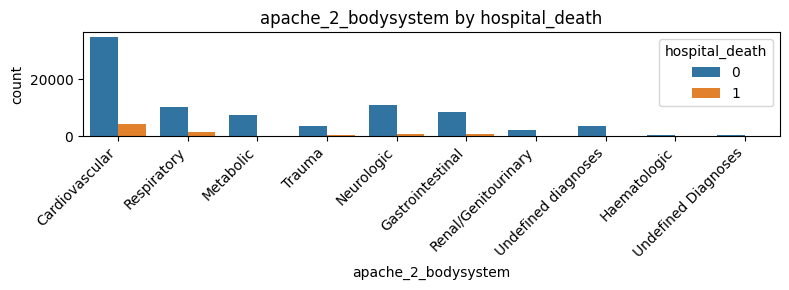

In [25]:
# Key categorical variables: distributions and relationship with death
cat_cols = ['gender', 'ethnicity', 'icu_type', 'icu_admit_source', 'apache_2_bodysystem']
for col in cat_cols:
    if col in df.columns:
        print(f'\nColumn: {col}')
        display(df[col].value_counts().head(10))
        plt.figure(figsize=(8,3))
        sns.countplot(data=df, x=col, hue=target_col) 
        plt.title(f'{col} by {target_col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

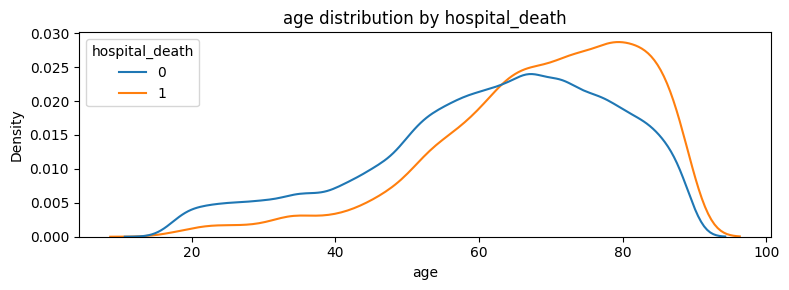

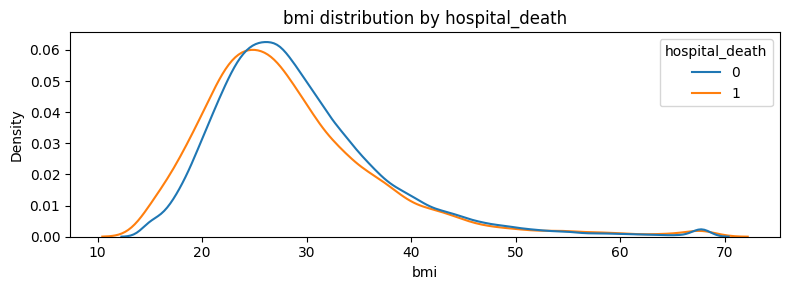

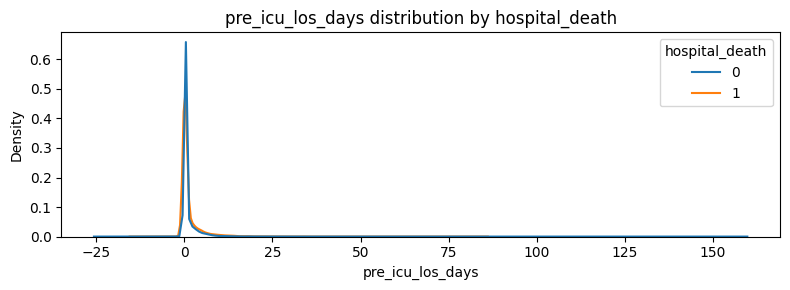

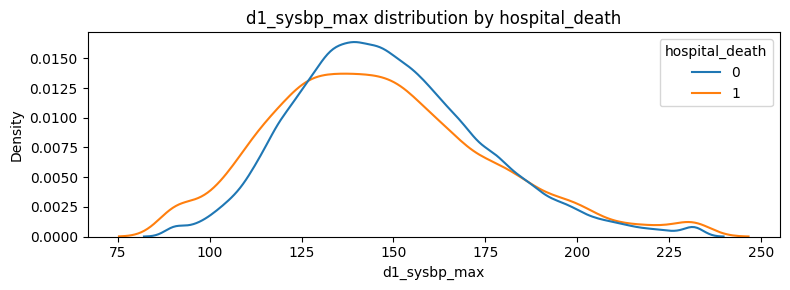

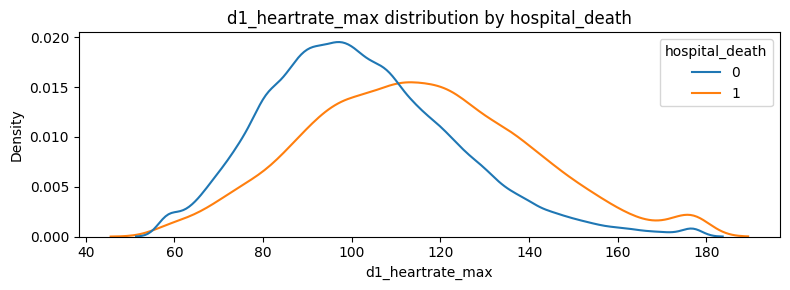

In [26]:
# Numerical distributions and KDE by outcome
num_cols = ['age', 'bmi', 'pre_icu_los_days', 'd1_sysbp_max', 'd1_heartrate_max']
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(8,3))
        sns.kdeplot(data=df, x=col, hue=target_col, common_norm=False)
        plt.title(f'{col} distribution by {target_col}')
        plt.tight_layout()
        plt.show()

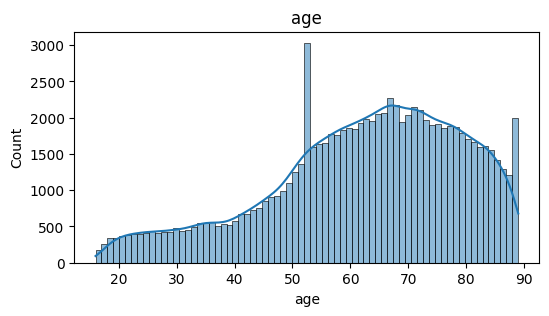

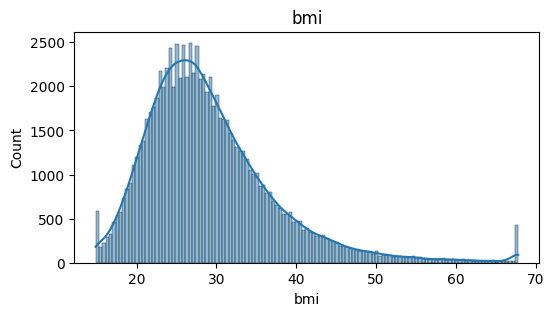

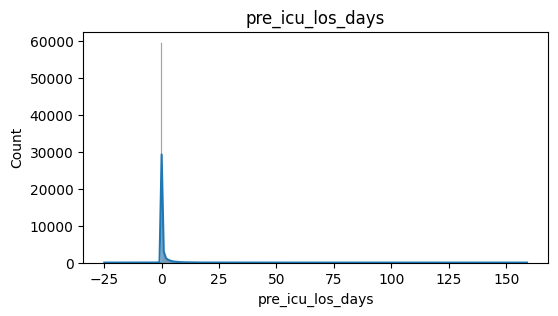

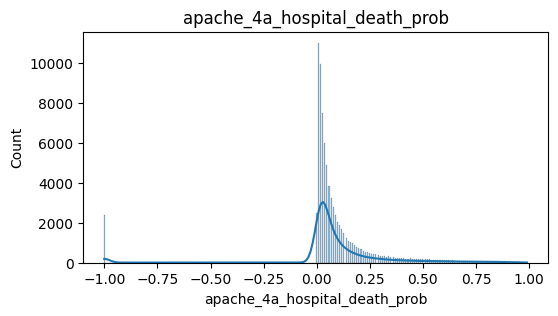

In [27]:
# Univariate histograms for a few numeric columns
numeric_cols = ['age', 'bmi', 'pre_icu_los_days', 'apache_4a_hospital_death_prob']
for col in numeric_cols:
    if col in df.columns:
        plt.figure(figsize=(6,3))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(col)
        plt.show()

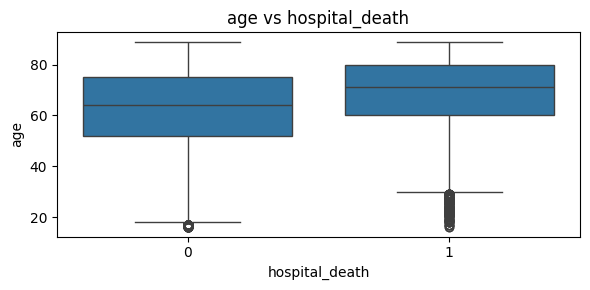

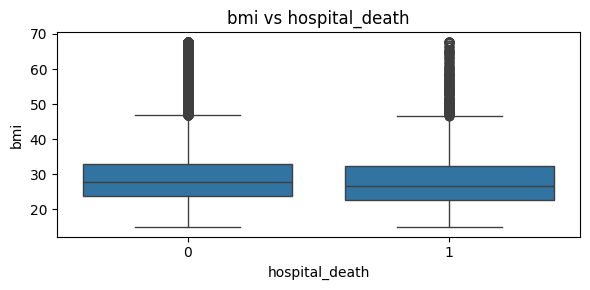

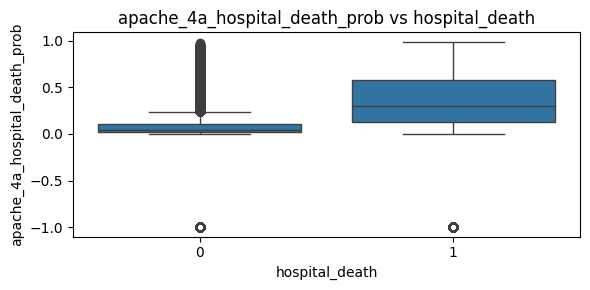

In [28]:
# Example relationship with target for a few features (boxplots)
feature_cols = ['age', 'bmi', 'apache_4a_hospital_death_prob']
for col in feature_cols:
    if col in df.columns:
        plt.figure(figsize=(6,3))
        sns.boxplot(x=target_col, y=col, data=df)
        plt.title(f'{col} vs {target_col}')
        plt.tight_layout()
        plt.show()

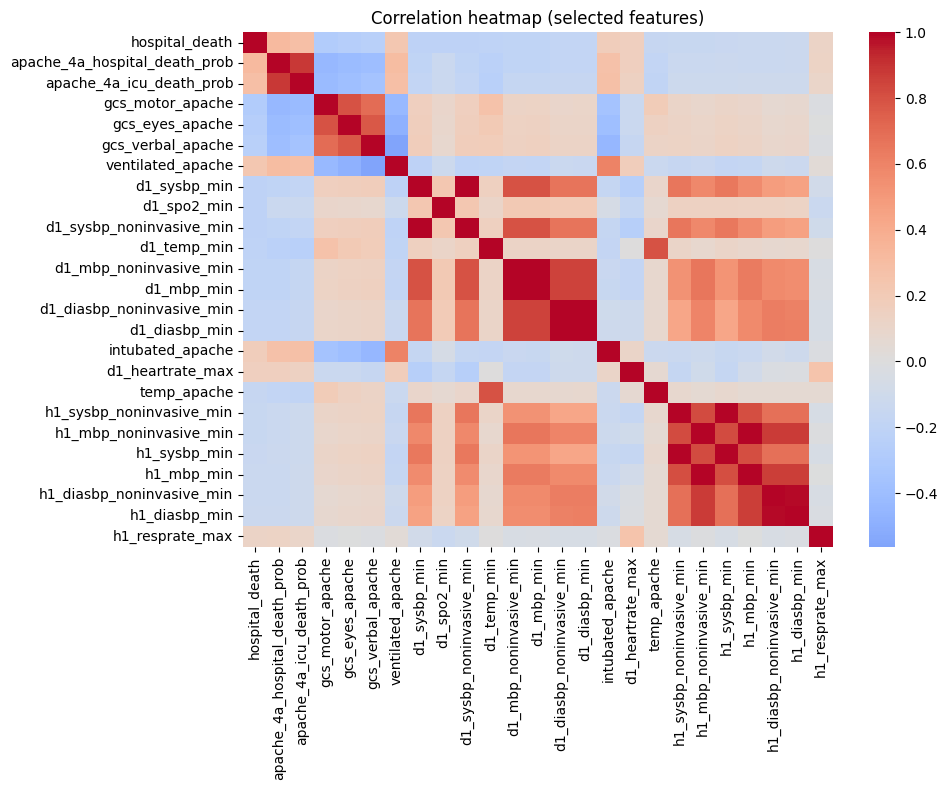

In [29]:
# Correlation heatmap for numeric features (top subset for readability)
corr = df.corr(numeric_only=True)
# Pick top 25 variables by absolute correlation with target (if present)
if target_col in corr.columns:
    target_corr = corr[target_col].abs().sort_values(ascending=False).head(25).index
    corr_sub = corr.loc[target_corr, target_corr]
else:
    corr_sub = corr.iloc[:25, :25]
plt.figure(figsize=(10,8))
sns.heatmap(corr_sub, cmap='coolwarm', center=0)
plt.title('Correlation heatmap (selected features)')
plt.tight_layout()
plt.show()


Mortality rate by icu_type:


icu_type
MICU            0.120858
Cardiac ICU     0.103434
Med-Surg ICU    0.087495
Neuro ICU       0.083127
CCU-CTICU       0.075741
SICU            0.074870
CTICU           0.060205
CSICU           0.055062
Name: hospital_death, dtype: float64

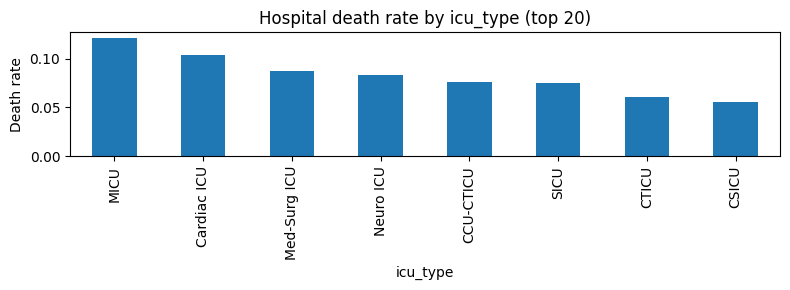


Mortality rate by hospital_id:


hospital_id
130    0.500000
51     0.290909
155    0.206522
29     0.180000
145    0.178862
76     0.158537
71     0.148810
14     0.145202
32     0.144124
23     0.142857
184    0.142857
150    0.138889
100    0.136852
101    0.136483
68     0.133333
176    0.133178
177    0.123457
24     0.120401
109    0.120125
181    0.119826
Name: hospital_death, dtype: float64

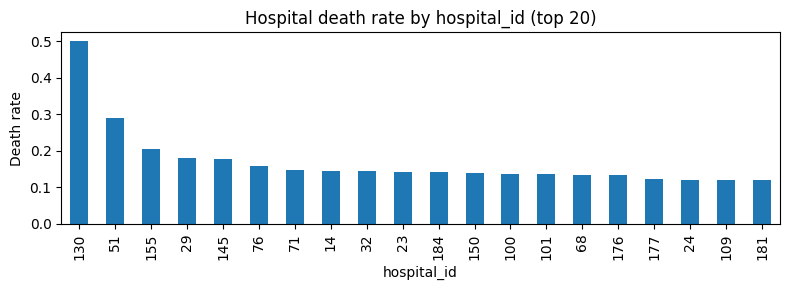

In [30]:
# ICU and hospital level mortality (useful for FL client definition)
for col in ['icu_type', 'hospital_id']:
    if col in df.columns:
        rate = df.groupby(col)[target_col].mean().sort_values(ascending=False)
        print(f'\nMortality rate by {col}:')
        display(rate.head(20))
        plt.figure(figsize=(8,3))
        rate.head(20).plot(kind='bar')
        plt.ylabel('Death rate')
        plt.title(f'Hospital death rate by {col} (top 20)')
        plt.tight_layout()
        plt.show()

### Quick recommendations
- Consider dropping columns with very high missingness (see missingness table).
- Drop model-based leakage features such as `apache_4a_hospital_death_prob` from training features.
- Consider `class_weight='balanced'` or `scale_pos_weight` for boosting if death rate is low.
- Review correlated features in the heatmap and consider removing/reducing collinearity.